<a href="https://colab.research.google.com/github/MateusMaruzka/lowcostsensors_calib/blob/main/calib_lowcostsensors_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split, GridSearchCV, \
                                    validation_curve, cross_val_score, \
                                    cross_validate, \
                                    RepeatedKFold
from sys import version
print("running: ", version)

!wget https://github.com/MateusMaruzka/lowcostsensors_calib/blob/main/dataset.csv

running:  3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]
--2022-11-29 15:44:52--  https://github.com/MateusMaruzka/lowcostsensors_calib/blob/main/dataset.csv
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘dataset.csv.1’

dataset.csv.1           [ <=>                ]   2.11M  --.-KB/s    in 0.06s   

2022-11-29 15:44:53 (35.2 MB/s) - ‘dataset.csv.1’ saved [2216673]



In [4]:
df = pd.read_csv('dataset.csv')
df.set_index('Date/Time', inplace = True)
df.dropna(inplace=True)

In [20]:
var = 'o3'
label_ref = var + '_iat'
label_envcity = var + '_envcity'

Yco = df[label_ref]

Xco = df.loc[Yco.index][[label_ref,'temperatura_envcity','umidade_envcity', label_envcity]]

X_train, X_test, y_train, y_test = train_test_split(Xco, Yco, train_size=0.5)
rkf = RepeatedKFold(n_splits = 5, n_repeats = 1, random_state = 0)

In [21]:
param_grid = {"n_estimators": [10, 15],
              "max_depth": [32, 64, 128],
              'criterion': ['squared_error', 'absolute_error']}

gs = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, n_jobs=-1, verbose = 3,\
                  return_train_score=True, cv = rkf)
gs.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=0),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [32, 64, 128], 'n_estimators': [10, 15]},
             return_train_score=True, verbose=3)

In [23]:
print("Train Score: ", gs.score(X_train, y_train))
print("Test Score: ", gs.score(X_test, y_test), r2_score(y_test, gs.predict(X_test)))


Train Score:  0.9998426115573531
Test Score:  0.99951842801754 0.99951842801754


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mean accuracy: 0.94+/-0.11


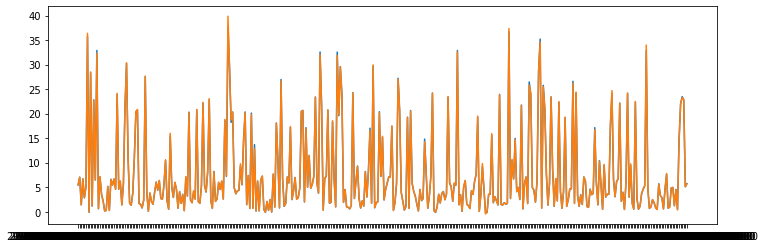

In [27]:
plt.figure(figsize=(12, 4))

plt.plot(gs.predict(X_test))
plt.plot(y_test)

scores = cross_val_score(gs, Xco, Yco)
print(f"Mean accuracy: {scores.mean():.2f}+/-{scores.std():.2f}")
# plt.gcf().autofmt_xdate() 
# plt.xlabel("Number of trees")
# plt.ylabel("Accuracy (out-of-bag)")